In [70]:
dice_no=6        #number of dice
dice_face=16         #number of dice face
dice_roll=10000000  #number of rolls

In [71]:
from collections import Counter
import random
import sys
import pandas as pd
import matplotlib.pyplot as plot
import math

In [72]:
%%time
roll_set=[]
for m in range(dice_roll):
    dice_set=[]
    #-----------------dice roll------------------------
    for n in range(dice_no):
        dice = random.randint(1,dice_face)
        dice_set.append(dice)
    #--------------------------------------------------
    roll_set.append(sum(dice_set))

#Since there are n number of dice, the minimum sum of the total dice must be the value of dice_no. 
#The maximum sum of a dice roll is the number of dice_face multiply by dice_no


#--------------count unique values in array_-----------------------
Freq_Count=[]
for x in range(dice_no,(dice_no*dice_face)+1):
    y=0
    for z in range(len(roll_set)):
       if x==roll_set[z]:
            y+=1
    Freq_Count.append({'Sum of Die':x,'Count of Sum':y,'Probability':(float(y/dice_roll))})
#------------------------------------------------------------------

CPU times: user 6min 52s, sys: 124 ms, total: 6min 52s
Wall time: 6min 52s


In [73]:
Freq_Table=pd.DataFrame(Freq_Count)
Freq_Table.head()

,Sum of Die,Count of Sum,Probability
0,6,0,0.000000
1,7,0,0.000000
2,8,13,0.000001
3,9,34,0.000003
4,10,64,0.000006


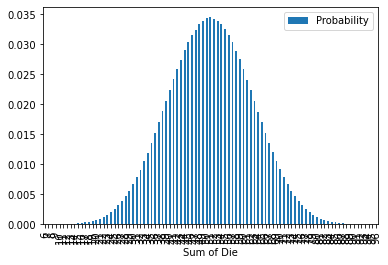

In [74]:
Freq_Table.plot(kind='bar', x='Sum of Die', y='Probability')
plot.show()

In [76]:
if Freq_Table['Sum of Die'].count()<=10:
    top_percent=0.5
else:
    top_percent=0.1
print(top_percent)
Top_5=Freq_Table.nlargest((math.ceil(top_percent*Freq_Table['Sum of Die'].count())),'Probability')
Max_Sum=Top_5['Sum of Die'].max()
Min_Sum=Top_5['Sum of Die'].min()
Probability=Top_5['Probability'].sum()
"For rolling {} dices with {} faces for {} roll, there is {}% chance to get sum of die in range of {} and {}".format(dice_no, dice_face, dice_roll, math.ceil(Probability*100), Min_Sum, Max_Sum)

0.1


'For rolling 6 dices with 16 faces for 10000000 roll, there is 34% chance to get sum of die in range of 46 and 55'